1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки
sklearn)
2. Оставьте два признака - sepal_length и sepal_width и целевую
переменную - variety
3. Разделите данные на выборку для обучения и тестирования
4. Постройте модель LDA
5. Визуализируйте предсказания для тестовой выборки и центры классов
6. Отбросьте целевую переменную и оставьте только два признака -
sepal_length и sepal_width
7. Подберите оптимальное число кластеров для алгоритма kmeans и
визуализируйте полученную кластеризацию

In [161]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [162]:
iris = load_iris()

In [163]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [164]:
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['class'] = iris.target
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [165]:
data = data[['sepal length (cm)','sepal width (cm)','class']]

In [166]:
from sklearn.model_selection import train_test_split
data_train, data_test = train_test_split(data, test_size=0.2)

In [167]:
y_train, y_test = data_train['class'], data_test['class']
del data_train['class']
del data_test['class']

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [169]:
lda = LinearDiscriminantAnalysis()

In [170]:
lda.fit(data_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [171]:
lda.predict(data_test)

array([1, 1, 0, 0, 2, 2, 0, 1, 0, 2, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 2])

In [172]:
result = pd.DataFrame([y_test.values, lda.predict(data_test)]).T

In [173]:
result

,0,1
0,2,1
1,1,1
2,0,0
3,0,0
4,2,2
5,2,2
6,0,0
7,1,1
8,0,0
9,2,2


In [174]:
from sklearn.metrics import accuracy_score

In [175]:
accuracy_score(y_test, lda.predict(data_test))

0.8666666666666667

In [176]:
lda.coef_

array([[-6.10897479,  8.14242602],
       [ 1.33620254, -3.16166569],
       [ 3.84043693, -3.80230333]])

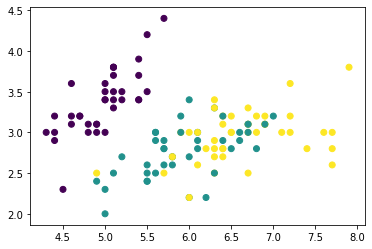

In [177]:
plt.scatter(data_train['sepal length (cm)'], data_train['sepal width (cm)'], c=y_train)
plt.show()

In [188]:
small_train = data_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 1) | (y_train == 2)]
small_test = data_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]

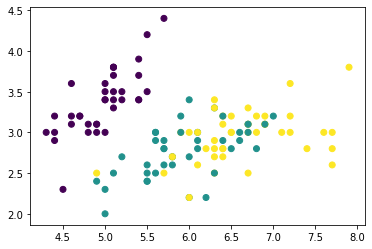

In [179]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [180]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [181]:
lda_small.means_

array([[4.96944444, 3.37777778],
       [5.95609756, 2.77804878],
       [6.59534884, 2.94651163]])

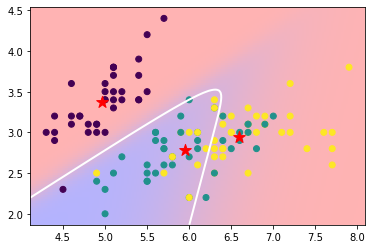

In [183]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')
nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1)
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

In [184]:
lda_small.coef_

array([[-6.10897479,  8.14242602],
       [ 1.33620254, -3.16166569],
       [ 3.84043693, -3.80230333]])

In [189]:
accuracy_score(sy_test, lda_small.predict(small_test))

0.8571428571428571

## Кластеризация

In [97]:
from sklearn.preprocessing import StandardScaler

In [98]:
scaler = StandardScaler()

In [99]:
scaled = scaler.fit_transform(data.iloc[:,0:2])

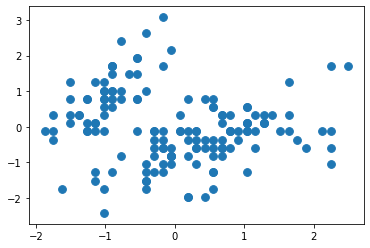

In [100]:
plt.scatter(scaled[:,0], scaled[:,1],cmap='autumn', s=60)

In [101]:
from sklearn.cluster import KMeans

In [102]:
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(scaled)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 2, 0, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 0, 2,
       2, 0, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

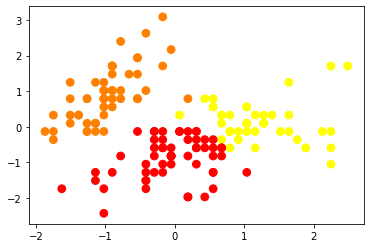

In [103]:
plt.scatter(scaled[:,0], scaled[:,1],cmap='autumn', c=clusters, s=60)

In [104]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(scaled)
    k_inertia.append(clf_kmeans.inertia_)

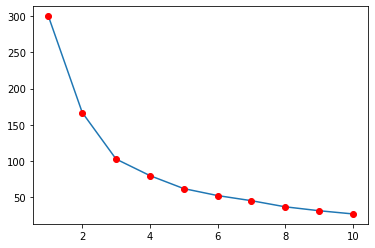

In [105]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

на графике видно, что оптимальное количество кластеров от 3 до 6.